In [39]:
from mongoengine import connect, disconnect_all
from utils import mongo_to_df
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as ms
import numpy as np
import random
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

np.random.seed(21)
random.seed(21)

### Preparando dados

In [2]:
connect("tcc")
df = mongo_to_df()
disconnect_all()

In [3]:
df.head()

,_id,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,answer_9,answer_10,answer_11,evaded,user_id
0,FAKE_answer-17e4e593581240e29ab1e5c3427f945e,True,False,False,False,False,True,False,True,True,True,True,False,FAKE_user-c0065f16f964447f854fec27f697ff50
1,FAKE_answer-02bee963584e45c6836d0aab2d3b5482,True,False,False,False,True,False,False,True,False,True,True,True,FAKE_user-b030f4a84c0e4223beb701aaf79dbf51
2,FAKE_answer-a21c2c0c30ba487388c63e0645130120,True,False,False,False,True,True,True,False,True,True,True,True,FAKE_user-7d4fc1783f8f4964aeb1d8f6db3ba3a9
3,FAKE_answer-9010730262ad45babdf01293a03dbeed,False,True,False,True,False,False,False,False,False,False,False,False,FAKE_user-8190078bf6204bdaa58099048df24eb9
4,FAKE_answer-268c9cc5a4564d8f9252d37b5a056174,True,False,True,False,True,True,False,True,True,True,False,False,FAKE_user-955bbf2a71f64941b9d62fa47cc9b47a


In [4]:
df = df.drop(columns=["_id", "user_id"])

In [5]:
# df = df.astype(int)

In [6]:
df.head()

,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,answer_9,answer_10,answer_11,evaded
0,True,False,False,False,False,True,False,True,True,True,True,False
1,True,False,False,False,True,False,False,True,False,True,True,True
2,True,False,False,False,True,True,True,False,True,True,True,True
3,False,True,False,True,False,False,False,False,False,False,False,False
4,True,False,True,False,True,True,False,True,True,True,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   answer_1   100 non-null    bool 
 1   answer_2   100 non-null    bool 
 2   answer_3   100 non-null    bool 
 3   answer_4   100 non-null    bool 
 4   answer_5   100 non-null    bool 
 5   answer_6   100 non-null    bool 
 6   answer_7   100 non-null    bool 
 7   answer_8   100 non-null    bool 
 8   answer_9   100 non-null    bool 
 9   answer_10  100 non-null    bool 
 10  answer_11  100 non-null    bool 
 11  evaded     100 non-null    bool 
dtypes: bool(12)
memory usage: 1.3 KB


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Separação dos dados

In [60]:
# X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [61]:
len(X_train)

80

# Regressão Logística

In [62]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6


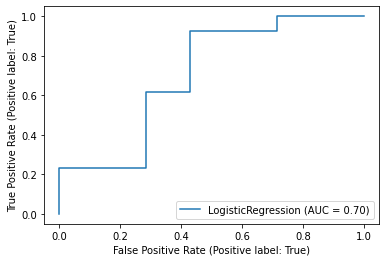

In [63]:
logistic_roc = plot_roc_curve(classifier, X_test, y_test)

# Árvore de decisão

In [64]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7


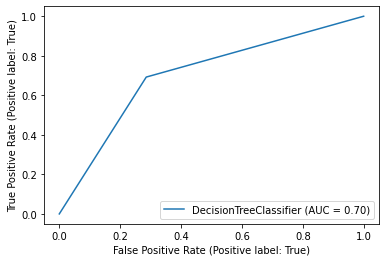

In [65]:
decision_tree_roc = plot_roc_curve(classifier, X_test, y_test)

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.45


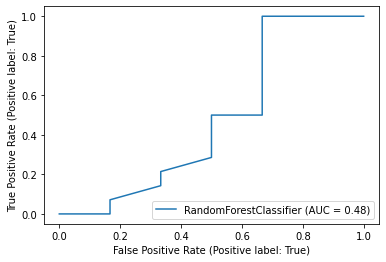

In [56]:
random_forest_roc = plot_roc_curve(classifier, X_test, y_test)

# Support Vector Machine

In [59]:
from sklearn.svm import SVC
classifier = SVC(random_state=42)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6


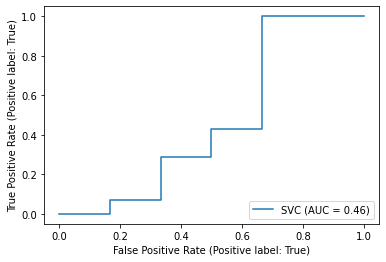

In [58]:
svm_roc = plot_roc_curve(classifier, X_test, y_test)

# Plotando ROC dos modelos

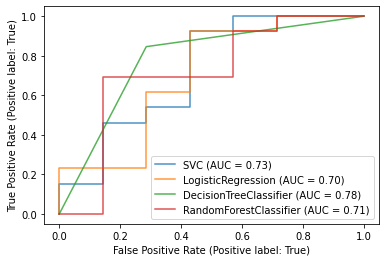

In [48]:
ax = plt.gca()
svm_roc.plot(ax=ax, alpha=0.8)
logistic_roc.plot(ax=ax, alpha=0.8)
decision_tree_roc.plot(ax=ax, alpha=0.8)
random_forest_roc.plot(ax=ax, alpha=0.8)